In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM

In [2]:
maxlen = 200
batch_size = 32
embedding_dims = 300
epochs = 10
num_neurons = 50

In [3]:
model = Sequential()
model.add(LSTM(units=num_neurons, return_sequences=True,
               input_shape=(maxlen, embedding_dims)))
model.add(Dropout(rate=.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           70200     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 80,201
Trainable params: 80,201
Non-trainable params: 0
_________________________________________________________________


In [5]:
import sys

sys.path.append('../')
from example_preprocessing.example_preprocessing import get_prepared_test_train_data, preprocess_to_nn

C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\constants.py:136: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  [datetime.datetime, pd.datetime, pd.Timestamp])
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\tutil.py:100: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  np = pd.np
C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\pugnlp\util.py:80: FutureWarning: The pandas.np module is deprecated and wil

In [6]:
(x_train, y_train), (x_test, y_test) = get_prepared_test_train_data(
    length_lim=10_000, w2v_limit=100_000, maxlen=maxlen, embedding_dims=embedding_dims)

INFO:nlpia.loaders:Downloading w2v
INFO:nlpia.web:URL too short: w2v
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.300d\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.27b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.42b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.6b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.bin\.gz$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.tgz$, string=googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:expanded+normalized file path: C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\nlpia\bigdata\googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:requesting URL: https://www.dr

Dataset length limit APPLIED
Current size of dataset:  10000
Count train samples: 8000
Count test samples: 2000


In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/10
250/250 [==============================] - 9s 19ms/step - loss: 0.5164 - accuracy: 0.7380 - val_loss: 0.4127 - val_accuracy: 0.8075
Epoch 2/10
250/250 [==============================] - 3s 12ms/step - loss: 0.3694 - accuracy: 0.8414 - val_loss: 0.4290 - val_accuracy: 0.8070
Epoch 3/10
250/250 [==============================] - 3s 12ms/step - loss: 0.3103 - accuracy: 0.8670 - val_loss: 0.3966 - val_accuracy: 0.8295
Epoch 4/10
250/250 [==============================] - 3s 12ms/step - loss: 0.2709 - accuracy: 0.8886 - val_loss: 0.4169 - val_accuracy: 0.8220
Epoch 5/10
250/250 [==============================] - 3s 12ms/step - loss: 0.2192 - accuracy: 0.9128 - val_loss: 0.4114 - val_accuracy: 0.8260
Epoch 6/10
250/250 [==============================] - 3s 12ms/step - loss: 0.1740 - accuracy: 0.9341 - val_loss: 0.4444 - val_accuracy: 0.8200
Epoch 7/10
250/250 [==============================] - 3s 12ms/step - loss: 0.1264 - accuracy: 0.9550 - val_loss: 0.4830 - val_accuracy: 0.8265

In [8]:
history = _

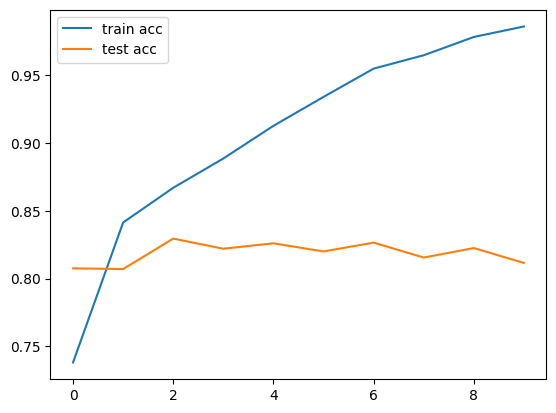

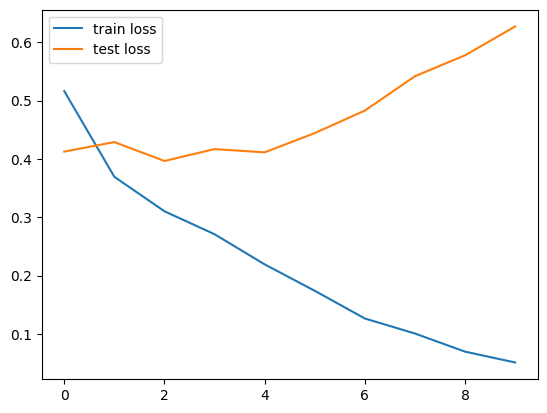

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

In [10]:
# save model to file:
model_structure = model.to_json()
with open('../src/part_8/simple_lstm_cut/lstm_model.json', 'w') as json_file:
    json_file.write(model_structure)
model.save_weights('../src/part_8/simple_lstm_cut/lstm_weights.h5')

### MODEL TESTING on negative example:

In [11]:
del x_train, y_train, x_test, y_test

In [12]:
del model

In [13]:
from keras.models import model_from_json


with open("../src/part_8/simple_lstm_cut/lstm_model.json", 'r') as json_file:
    json_string = json_file.read()
model = model_from_json(json_string)
model.load_weights('../src/part_8/simple_lstm_cut/lstm_weights.h5')

In [14]:
sample = "I hate that the dismal weather had me down for so long, " \
         "when will it break! Ugh, when does happiness return? The sun is blinding " \
         "and the puffy clouds are too thin. I can't wait for the weekend."

In [15]:
test_vec = preprocess_to_nn(sample=sample, w2v_limit=100_000,
                            maxlen=maxlen, embedding_dims=embedding_dims)
prediction = model.predict(test_vec)
print('Positive statement: 1')
print('Negative statement: 0')
print('Prediction for negative sentence:', prediction)

INFO:nlpia.loaders:Downloading w2v
INFO:nlpia.web:URL too short: w2v
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.300d\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.27b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.42b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.6b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.bin\.gz$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.tgz$, string=googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:expanded+normalized file path: C:\Users\voldo\AppData\Local\Programs\Python\Python39\lib\site-packages\nlpia\bigdata\googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:requesting URL: https://www.dr

1/1 [==============================] - 0s 269ms/step
Positive statement: 1
Negative statement: 0
Prediction for negative sentence: [[0.00569997]]
